# Assignment 01 —— by Jie Ou (ID : 12432886)

### Score: `[107]`

Q1. `[10]` Good job! But be careful

Q2. `[10]` Good job!

Q3. `[16.5+5.5]` 很好的思路！最后输出注意引号就完美了。

Q4. `[5.5+16.5+5.5]` Quite great job!

Q5. `[5.5+26.5+5.5]` Good job! 个人觉得参数里加上matrix就更完美一点

各题注释用`### Note`给出，请自行查阅。

## 1. Flowchart

In [1]:
# 1题
def Print_values(a,b,c):
    if a > b:
        if b > c:
            ls = [a,b,c]
        else:
            if a > c:
                ls = [a,c,b]
            else:
                ls = [c.a,b] ###Note: 应为逗号
    else:
        if b > c:
            print('The path has been disconnected.')
        else:
            ls = [c,b,a]
    return ls[0]+ls[1]-10*ls[2]

print(Print_values(10,5,1))

5


## 2. Continuous ceiling function

In [6]:
# 2题
# 要计算 F(10)，ceil(10/3)=4，则需要 F(4)；
# 要计算 F(4)，ceil(4/3)=2，则需要 F(2)；
# 要计算 F(2)，ceil(2/3)=1，则需要 F(1)，题目已知F(1) = 1
from math import ceil
import random

def find(x):
    if x > 3: # 若x>3，则ceil(x/3)>1，需要递归F(ceil(x/3))的结果
        return find(ceil(x/3))+2*x
    else:
        if x == 1 : # 若x=1，则F(1)=1
            return 1
        else:       # 若x=2/3，则F(x)=F(1)+2x=1+2x
            return 1+2*x
            ### Note: 这步省略也行，可以把第一个条件写成x>1，会递归到所有情况
N = 10
ls1 = [random.randint(1,100) for x in range(N)]  # 创建 N 个正整数的列表
for i in ls1:
    print(f'F({i}) = {find(i)}')

F(55) = 169
F(64) = 195
F(58) = 177
F(35) = 107
F(70) = 211
F(15) = 45
F(45) = 135
F(66) = 199
F(71) = 213
F(3) = 7


## 3. Dice rolling

**解题思路：**
- 计算10个骰子总和为30的可能，即Sum【9个骰子总和分别为29（即30-1）、28（即30-2）、...、24（即30-6）的可能】
- 若要计算9个骰子总和分别为29的可能，则计算Sum【8个骰子总和分别为28、...、23的可能】
- ...依次递归
- 若计算的总和小于骰子数目（eg.3个骰子总和为2）OR 总和大于6倍的骰子数目（eg. 3个骰子总和为18），则可能性为0
- 最后递归至计算1个骰子总和为1、2、3、4、5、6的可能性，即1（就一种可能）

In [4]:
# 3题
## 3.1

def Find_number_of_ways(num, total): # num为骰子数量，total为所有骰子数值的总和
    if num <= total <= 6*num: # 计算的总和介于【骰子数目，6倍骰子数目】之间才有可能，否之可能性则为0
        if num == 1: # 一个骰子掷出1、2、3、4、5、6的可能性为1
            return 1
        else:  
            # 若用【n,m】表示 n 个骰子掷出总和为 m 的可能
            # 则【n,m】=【n-1,m-1】+【n-1,m-2】+【n-1,m-3】+【n-1,m-4】+【n-1,m-5】+【n-1,m-6】
            s = 0 # 初始化，用于累加（n-1）个骰子所有可能的投掷结果
            for i in range(1,7):  # 遍历（n-1）骰子之外的【1】枚骰子的每个值(1、2、...、6)
                s += Find_number_of_ways(num-1,total-i) # 累加（n-1）个骰子所有可能的投掷结果
            return s

    else: # （'总和 < 骰子数目' AND '总和 > 6*骰子数目'）的可能性为0
        return 0

## 3.2
Number_of_ways = [] # 初始化列表，用以存储每个total所需的ways数目
ways_max = 0  # 初始化最大值，用于找最大值

for i in range(10,61):
    i_ways = Find_number_of_ways(10, i)
    Number_of_ways.append(i_ways)
    if ways_max < i_ways:
        ls_ways_max_total = [] # 创建空列表，同时若有更大的值则初始化列表，用于存储最大值对应的total
        ways_max = i_ways # 将最大值更新
        ls_ways_max_total.append(str(i))
    elif ways_max == i_ways:
        ls_ways_max_total.append(i) # 若有多个相同的最大值，则存储每个ways最大值对应的total
print(f"Maximum of Number_of_ways is : {ways_max}. \nIts corresponding x(number/total) is : {'、'.join(ls_ways_max_total)}.")

Maximum of Number_of_ways is : 4395456. 
Its corresponding x(number/total) is : 35.


## 4. Dynamic programming

<function matplotlib.pyplot.show(close=None, block=None)>

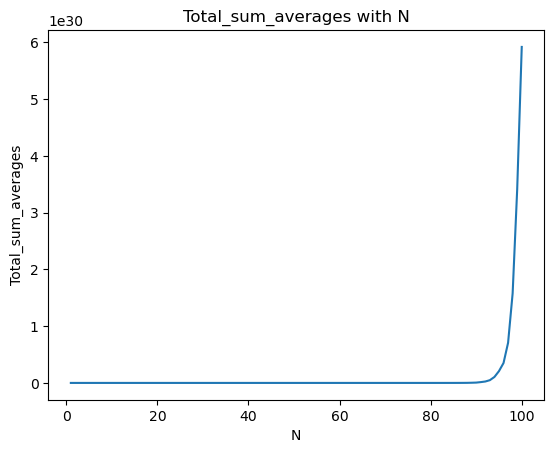

In [43]:
# 4题
## 4.1
import random
def Random_integer(N):
    ls_num = [] # 初始化数组列表
    for i in range(N):
        ls_num.append(random.randint(0,10))
    return ls_num
## 4.2
## 数据子集共有len个元素，分别可组成1、2、3、...、i、i+1、...、len个元素的子集
## 对于有 i 个元素的子集集合，其每个元素应具有相同的权重，即每个元素在所有集合中出现的总数相同
## 其中一个元素出现的次数，等于在剩下的(len-1)个样本中不重复抽取(i-1)个样本的情况，即排列组合C(len-1,i-1)
## 则 i 个元素的子集的集合的平均值为，(sum[1、2、3、...、len] / i) * C(len-1,i-1)
## 用 j 遍历1、2、3、...、i、i+1、...、len，将每i个元素子集集合的平均值相加，即得到总的平均值
## eg.[1,2,3,4,5]数组4个元素的集合为{[1,2,3,4]、[1,2,3,5]、[1,2,4,5]、[1,3,4,5]、[2,3,4,5]}，1、2、3出现的次数为C(4,3)=4
##    [1,2,3,4,5]数组4个元素的集合的平均值为(sum[1,2,3,4,5]/4)*C(4,3)=15/4*4=15
##    [1,2,3,4,5]数组3个元素的集合的平均值为(sum[1,2,3,4,5]/3)*C(4,2)
##    [1,2,3,4,5]数组2个元素的集合的平均值为(sum[1,2,3,4,5]/2)*C(4,1)
##    [1,2,3,4,5]数组1个元素的集合的平均值为(sum[1,2,3,4,5]/1)*C(4,0)
##    [1,2,3,4,5]数组5个元素的集合的平均值为(sum[1,2,3,4,5]/5)*C(4,4)
def Sum_averages(array):
    ave = 0 # 初始化平均值
    for i in range(1,len(array)+1): # 遍历子集元素数目为1、2、...、i、...、len的情况
        C0 = 1 # 初始化组合数
        # 1 个元素时(i=1)，C(len-1,0)==1=C0（恒等于1）
        if i != 1:  
        # 2 个元素时，C(len-1,i-1) = (len-1) / (1)
        # 3 个元素时，C(len-1,i-1) = (len-1)*(len-2) / (1*2)
        # i 个元素时，C(len-1,i-1) = (len-1)*(len-2)*...*(len-(i-1)) / (1*2*...*(i-1))
            for j in range(1,i):
                C0 *= (len(array)-j)/j
        ave += (sum(array)/i)*C0
    return ave

## 4.3
N1 = []
Total_sum_averages = []

for i in range(1,101):
    N1.append(i)
    Total_sum_averages.append(Sum_averages(Random_integer(i)))
    
import matplotlib.pyplot as plt
plt.plot(N1, Total_sum_averages)

plt.xlabel("N")
plt.ylabel("Total_sum_averages")
plt.title("Total_sum_averages with N")
plt.show

图像结果描述：N个所有子集的平均值随着N的增加呈现指数型增长

## 5. Path counting

In [1]:
# 5题
## 5.1
import random
def create_matrix(N,M): # N为行数，M为列数
    matrix_0 = [] 
    for i in range(N):
        matrix_0.append([random.randint(0,1) for j in range(M)])    
    matrix_0[0][0]=1    # 将左上角单元格填充为1
    matrix_0[-1][-1]=1  # 将右下角单元格填充为1
    return matrix_0

## 5.2
## 采用递归的方法，Count_path(N,M) = Count_path(N-1,M) + Count(N,M-1)
## 即抵达(N,M)的路径数 = 抵达左边一格(N,M-1)的路径数 + 抵达上边一格(N-1,M)的路径数
def Count_path(N,M): # N为行数，M为列数
### Note: matrix没有传入函数奥，实际上是需要的，容易让人误解~传入matrix会更好一点，或者在函数中定义~
    # 若能递归到起点 (1,1) 的位置则记为 1 条路线
    if N==1 and M==1:
        return 1
    
    # 若递归到第一行(N=1)，且此时M≠1，则路线只有向左边一格递归的方向
    elif N==1:
        # 若左边一格数字为 1，则能走通，继续向前递归
        # 若左边一格数字为 0，则此路无法走通，即返回 0（表明没有这条路）
        if matrix[N-1][M-2]==1:     # 第N行，在py中为N-1；M-1列，在py中为M-2（py中0,0是初始位置）
            return Count_path(N,M-1)
        else:
            return 0 
        
    # 若递归到第一列(M=1)，且此时N≠1，则路线只有向上边一格递归的方向
    elif M==1:
        # 若上边一格数字为 1，则能走通，继续向前递归
        # 若上边一格数字为 0，则此路无法走通，即返回 0（表明没有这条路）
        if matrix[N-2][M-1]==1:
            return Count_path(N-1,M)
        else:
            return 0
    else:
        # 当左边一格和上边一格数值均为 1 时说明都可走通
        # 递归为：抵达左边一格的路径数 + 抵达上边一格的路径数
        if matrix[N-1][M-2]==1 and matrix[N-2][M-1]==1:
            return Count_path(N,M-1)+Count_path(N-1,M)
        # 当左边一格或上边一格数值仅有一个 1 时，说明仅其中一条可通
        # 递归为：抵达左边一格的路径数 OR 抵达上边一格的路径数
        elif matrix[N-1][M-2]==1:
            return Count_path(N,M-1)
        elif matrix[N-2][M-1]==1:
            return Count_path(N-1,M)
        else:
            return 0
        
## 5.3
N_row = 10 # 行数
M_col = 8 # 列数
s = 0 # 初始化路径总数
for i in range(1000):
    matrix = create_matrix(N_row,M_col)
    s += Count_path(N_row,M_col)
    
print(s/1000)  # 计算1000次运行的路径数平均值

0.323
